In [1]:
# Load extensions
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Importeren van bibliotheken
import math
import numpy as np
import matplotlib.pyplot as plt

from berekeningen_andreas import Brug

# Zoeken van meest ideale parameters voor brug
## Exploratie van formules
### Probleemstelling
Berekeningen gaan uit van volgende situatie:
![Berekeningen](figures/berekeningen_andreas2.0.svg)

In [3]:
brug = Brug(3, 0.3, 2, 2, 0.1, 0.1, 3)
brug.__dict__

{'h1': 3,
 'h2': 0.3,
 'd1a': 2,
 'd2a': 2,
 'd1b': 0.1,
 'd2b': 0.1,
 'N': 3,
 'cosa': 0.5144957554275266,
 'sina': 0.8574929257125443,
 'cosb': 0.9863939238321437,
 'sinb': 0.1643989873053573}

In [4]:
Va, Vb, Fi = brug.calc_reactie_krachten()
Va, Vb, Fi

(102.825, 102.825, [338.9833333333333, 272.31666666666666, 205.65])

In [5]:
FiA, FiB = brug.calc_touw_kracht()
FiA, FiB

((359.3810017856319, 288.70279699962833, 218.02459221362471),
 (187.4504653086901, 150.5852378523373, 113.72001039598445))

In [6]:
brug.calc_kant()

(-196.25358851674642,
 -445.60909090909087,
 (184.89999999999995, 167.85320934689335, 162.86434106371865),
 -19.62535885167464,
 -445.60909090909087,
 (184.89999999999998, 148.74195039722798, 112.79247081372424))

### Wegdek

Text(0, 0.5, 'M')

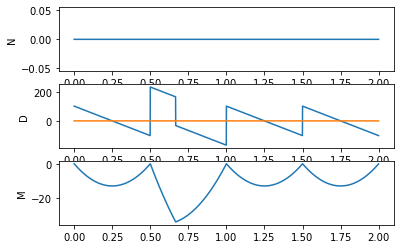

In [7]:
x = np.arange(0, 2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_wegdek(xi) for xi in x]))

plt.figure()
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2, sharex=ax1)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax2.plot(x, [0]*len(x))
ax3 = plt.subplot(3,1,3, sharex=ax1)
ax3.plot(x, [-m for m in M])
ax3.set_ylabel("M")

### Piloon 1

Text(0, 0.5, 'M')

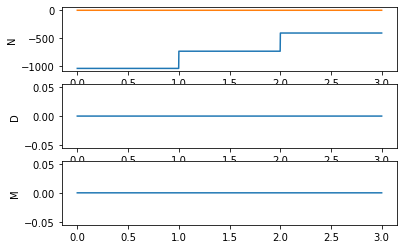

In [8]:
x = np.arange(0, brug.h1, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, True) for xi in x]))

plt.figure()
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")

### Piloon 2

Text(0, 0.5, 'M')

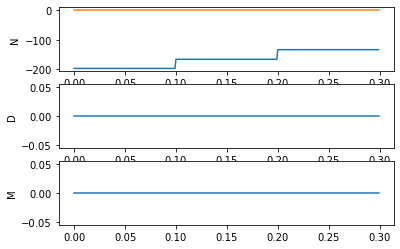

In [9]:
x = np.arange(0, brug.h2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi, False) for xi in x]))

plt.figure()
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")

## Optimalisatie

In [10]:
import genetic_algo as ga

# Maxwaarden
h1_max = 2 # 2m
h2_max = 2 # 2m
h1_min = 0.06 # 6cm
h2_min = 0.06 # 6cm
d1_max = 2 # 2m
d2_max = 2 # 2m
d1_min = 0.1 # 10cm
d2_min = 0.1 # 10cm
N_max = 10
N_min = 1

In [11]:
population = [ga.genRandomBrugA() for i in range(100)] # Populatie van 100

In [12]:
for i in range(100): # 1000 generations
    print('.', end="")
    population = ga.kill_population(population)
    population = ga.regen_population(population,
                                    ga.genRandomBrugA,
                                    ga.genFromParentsA)

....................................................................................................

In [13]:
best = ga.find_best(population)

======= Info Brug ========
h1:	0.06
h2:	2
d1a:	2
d2a:	2
d1b:	0.1
d2b:	0.1
N:	2
Krachten in touwen A
	204.25328341415994
	204.25328341415994
Krachten in touwen B
	335.4479061882003
	335.4479061882003
Krachten in touwen C
	204.0970873786407
	204.12252725833716
Krachten in touwen D
	204.0970873786407
	230.63948986072575
Maximale kracht trek/druk:
	N1: 156.29540112416964
	N2: 776.9467041389881
	D: 336.9629
Score brug: 2189.8742105263154


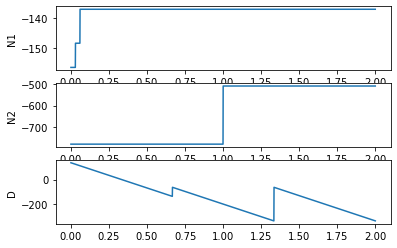

In [14]:
ga.print_brug(best[1])
print(f"Score brug: {best[0]}")

### Enkele berekende bruggen
```
======= Info Brug ========
h1:	0.06
h2:	1.1318279861842355
d1a:	2.1
d2a:	2
d1b:	2
d2b:	0.1
N:	2
Krachten in touwen A
	-387.5154756748858
	-387.5154756748858
Krachten in touwen B
	481.6223405629876
	481.6223405629876
Krachten in touwen C
	-387.4909555386635
	-404.5524345254277
Krachten in touwen D
	387.4909555386635
	404.3137722413377
Maximale kracht trek/druk:
	N1: 140.8333333333333
	N2: 828.2991889220579
	D: 340.6925000000001
Score brug: 2023.8019246879646
```
```
======= Info Brug ========
h1:	0.06
h2:	1.0652839017460745
d1:	0.1
d2:	2
N:	2
Krachten in touwen A
	-708.0892728345934
	-708.0892728345934
Krachten in touwen B
	905.4218833682901
	905.4218833682901
Krachten in touwen C
	-707.3734194648738
	-738.5195315469434
Krachten in touwen D
	707.3734194648738
	732.0296004492964
Maximale kracht trek/druk:
	N1: 266.6666666666666
	N2: 1585.3853201549225
	D: 666.4000000000001
Score brug: 3856.0163142124156
```
```
======= Info Brug ========
h1:	1.126803803965232
h2:	0.06
d1:	2
d2:	0.1
N:	2
Krachten in touwen A
	872.737237017732
	872.737237017732
Krachten in touwen B
	-667.255538772807
	-667.255538772807
Krachten in touwen C
	666.5809668731615
	692.5245096390946
Krachten in touwen D
	-666.5809668731615
	-695.9309607161756
Score brug: 3875.5966914564374
```
```
======= Info Brug ========
h1:	0.06
h2:	1.2516051534550352
d1:	0.1
d2:	2
N:	2
Krachten in touwen A
	-597.3713229720112
	-597.3713229720112
Krachten in touwen B
	818.4997111963966
	818.4997111963966
Krachten in touwen C
	-596.7674015585268
	-623.0434586797123
Krachten in touwen D
	596.7674015585268
	625.2992554442243
Maximale kracht trek/druk:
	N1: 266.6666666666666
	N2: 1573.7716882747561
	D: 666.4000000000001
Score brug: 3909.1072028074623
```
```
======= Info Brug ========
h1:	1.572067987257989
h2:	0.06
d1:	2
d2:	0.1
N:	2
Krachten in touwen A
	727.0758927725531
	727.0758927725531
Krachten in touwen B
	-470.76636300630054
	-470.76636300630054
Krachten in touwen C
	470.2904347579321
	505.30783775277274
Krachten in touwen D
	-470.290434757932
	-490.997628708161
Score brug: 3969.8161468717476
```
```
======= Info Brug ========
h1:	0.8867440380990106
h2:	0.06
d1:	2
d2:	0.1
N:	2
Krachten in touwen A
	1032.9862077900755
	1032.9862077900755
Krachten in touwen B
	-861.0049957136215
	-861.0049957136215
Krachten in touwen C
	860.1345499221471
	881.0165881426548
Krachten in touwen D
	-860.1345499221471
	-898.0068340091038
Maximale kracht trek/druk:
	N1: 1601.4252388529362
	N2: 266.6666666666667
	D: 666.4000000000001
Score brug: 3980.4220933118136
```
```
======= Info Brug ========
h1:	2
h2:	0.06
d1:	2
d2:	0.1
N:	2
Krachten in touwen A
	660.8112303255878
	660.8112303255878
Krachten in touwen B
	-366.92306545345394
	-366.92306545345394
Krachten in touwen C
	366.55211912943855
	409.8177278350128
Krachten in touwen D
	-366.5521191294386
	-382.69164752020333
Maximale kracht trek/druk:
	N1: 1549.5990836197016
	N2: 266.6666666666667
	D: 666.4000000000001
Score brug: 4019.610538373424
```